In [2]:
# Dt: 25/04/2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r"C:\Users\Acer\OneDrive\Data Science\Data Analysis\Numpy\Visadataset.csv")
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns

In [2]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
visa_df[['continent','case_status']] # Multiple Braces means List

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


In [10]:
visa_df.loc[:,['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [172]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [173]:
visa_df['continent'].nunique()

6

# Frequency Tables

-  frequency tables

- continent column has some unique continent names

- Total data size 25480 observations

- we will create a table having continents and number of applicants from each continent

In [174]:
# Step-1:  Total Data --->25480 observations
visa_df
# step-2: select particular column ----> continent wise (Asia,Africa,,,,)
visa_df['continent']
# step-3: equating a specific label
con = visa_df['continent'] == 'Asia' # ----> (0-True,1-True,3-False)
# step-4: pass the true condition to entire dataframe # Details of only Asian Applicants
visa_df[con]
# step-5: to find the no. of repeatations (length) # No. of applicants from Asia
len(visa_df[con])

16861

In [175]:
# Find No. of applicants from Asia
con = visa_df['continent'] == 'Asia'
count = len(visa_df[con])
count

16861

In [204]:
# Find No. of applicants from each continent
# Find all the continents Hint: Use unique()
applicants = []
labels = visa_df['continent'].unique()
for i in labels:
    con = visa_df['continent'] == i
    count = len(visa_df[con])
    applicants.append(count)
    
applicants_df = pd.DataFrame(zip(labels,applicants)
                             , columns = ['Continent','No. of Applicants'])
applicants_df.to_csv('applicant_df.csv', index=False)

In [282]:
# Prepare and export to csv the label count of all the columns
count = []
for column in cat[1:]:
    labels = visa_df[column].unique()
    for label in labels:
        con = visa_df[column] == label
        length = len(visa_df[con])
        count.append(length)
        df = pd.DataFrame(zip(labels,count),columns = [f'{column}','Count'])
        df.to_csv(f'{column}.csv', index = False)

# Value_counts

In [318]:
continent_vc = visa_df['continent'].value_counts()
keys = continent_vc.keys()
values = continent_vc.values
continent_df_vc = pd.DataFrame(zip(keys,values),columns = ['Continent','Count'])
continent_df_vc

,Continent,Count
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [326]:
for column in cat[1:]:
    vc = visa_df[column].value_counts()
    keys = vc.keys()
    values = vc.values
    df_vc = pd.DataFrame(zip(keys,values),columns = [f'{column}','Count'])
    df_vc.to_csv(f'{column}100.csv', index = False)

In [329]:
directory = r"C:\Users\Acer\OneDrive\Data Science\Data Analysis"
for column in cat[1:]:
    print(f'{directory}\\{column}_df.csv')

C:\Users\Acer\OneDrive\Data Science\Data Analysis\continent_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\education_of_employee_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\has_job_experience_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\requires_job_training_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\region_of_employment_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\unit_of_wage_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\full_time_position_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\case_status_df.csv


# How to Store File in a specified Folder

**Step-1: Create a Folder**

In [331]:
import os
folder_name = 'freq_tables'
os.makedirs(folder_name)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'freq_tables'

**Step-2: New_directory**

In [337]:
cwd = os.getcwd()
nwd = os.path.join(cwd,folder_name)

**Step-3: Full_paths**

In [340]:
for column in cat[1:]:
    file_name = f'{column}_df.csv'
    path = os.path.join(nwd,file_name)
    print(path)
    

C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\continent_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\education_of_employee_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\has_job_experience_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\requires_job_training_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\region_of_employment_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\unit_of_wage_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\full_time_position_df.csv
C:\Users\Acer\OneDrive\Data Science\Data Analysis\EDA\freq_tables\case_status_df.csv


In [344]:
import os
folder_name = 'Freqency_tables'
os.makedirs(folder_name)
cwd = os.getcwd()
nwd = os.path.join(cwd, folder_name)
for column in cat[1:]:
    vc = visa_df[column].value_counts()
    keys = vc.keys()
    values = vc.values
    df_vc = pd.DataFrame(zip(keys,values),columns = [f'{column}','Count'])
    file_name = f'{column}100.csv'
    path = os.path.join(nwd, file_name)
    df_vc.to_csv(path, index = False)

# groupby

- in sql we have a groupby option is there

- The same is available in python

- first it will group the similar labels together

- on that we can perform any mathematical operations

In [348]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [351]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

# Bar Charts

- bar charts under matplotlib

- plt.bar

In [354]:
keys = visa_df['continent'].value_counts().keys()
values = visa_df['continent'].value_counts().values

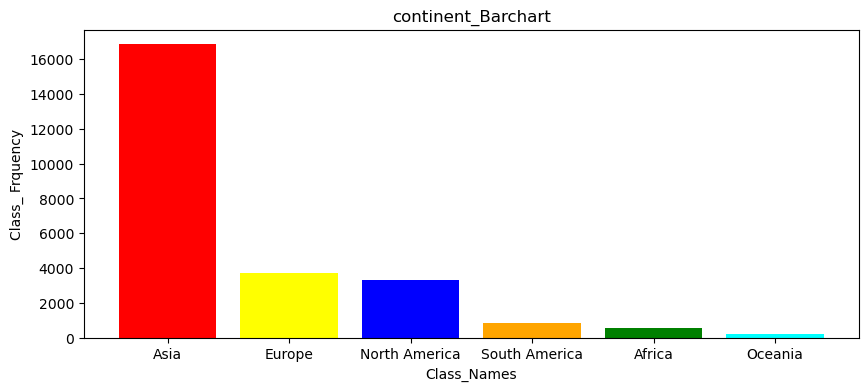

In [394]:
colors = ['Red','Yellow','Blue','Orange','Green','Cyan']
plt.figure(figsize=(10,4))
plt.bar(keys,values,color=colors)
plt.xlabel('Class_Names')
plt.ylabel('Class_ Frquency')
plt.title('continent_Barchart')
plt.savefig('continent_BarChart.jpg')
plt.show()

[WinError 183] Cannot create a file when that file already exists: 'BAR_CHART'


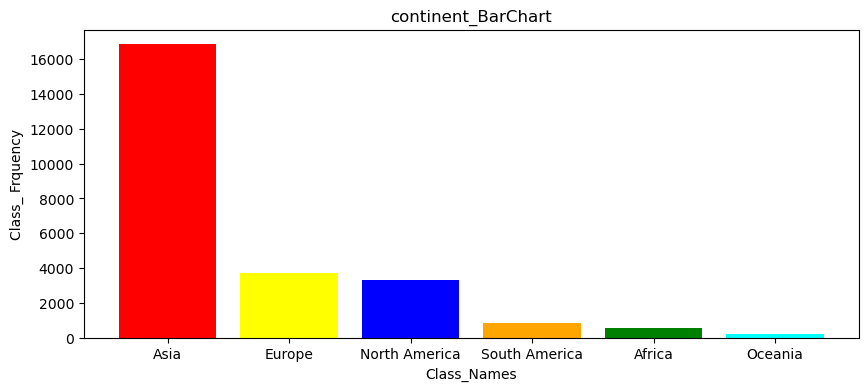

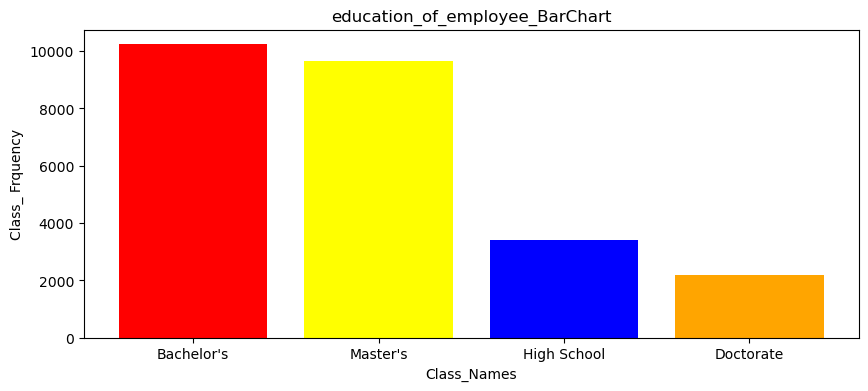

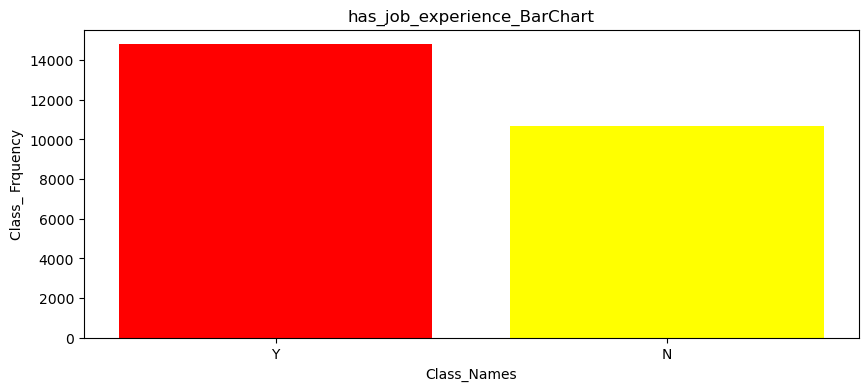

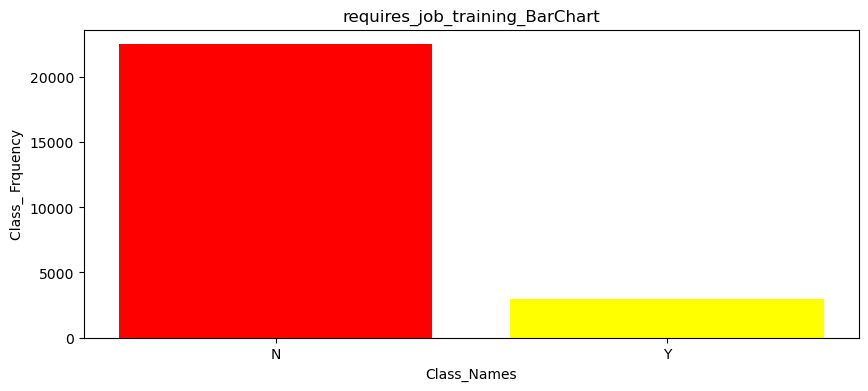

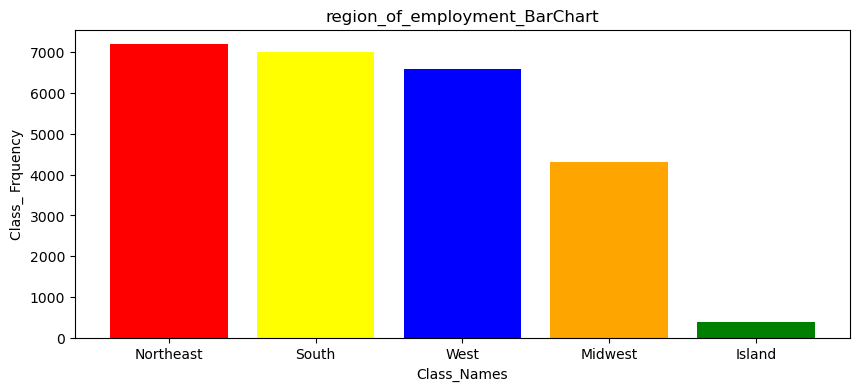

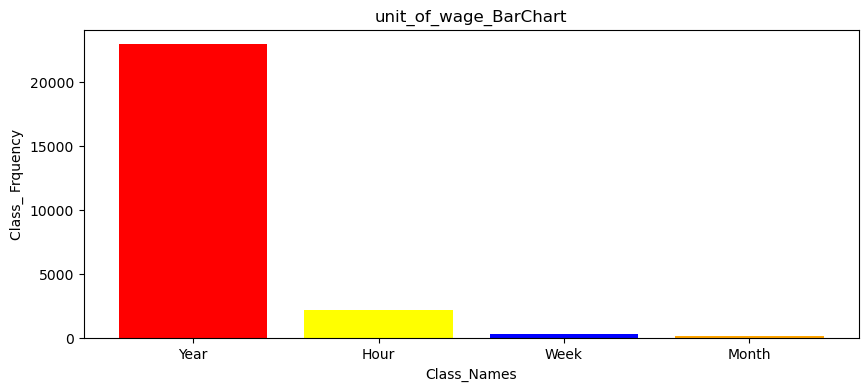

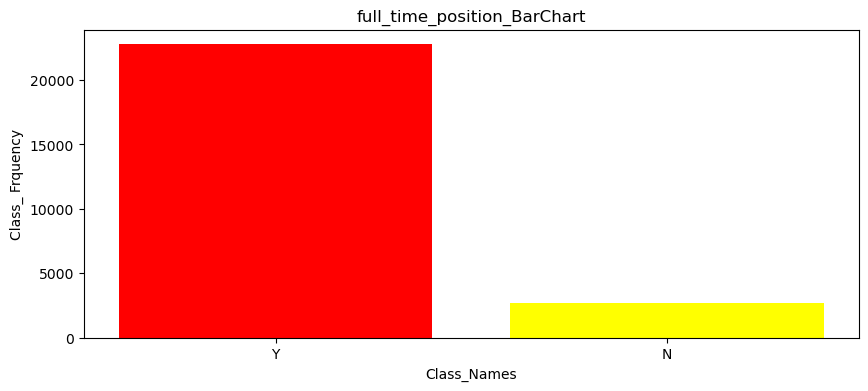

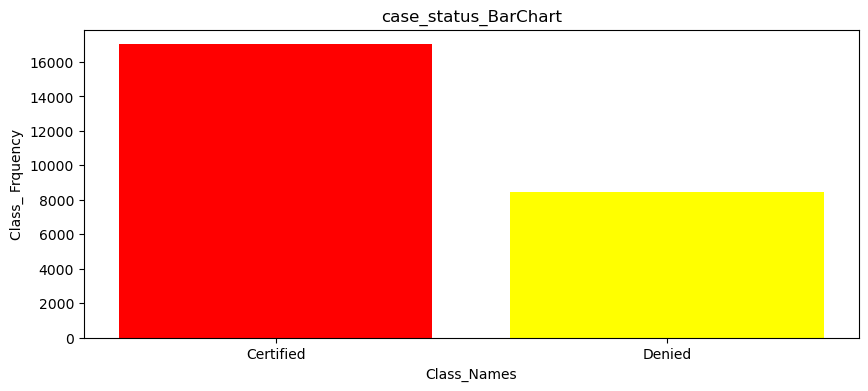

In [395]:
# Create Bar Chart and save in a separate folder
import os
folder_name = 'BAR_CHART'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)
cwd = os.getcwd()
nwd = os.path.join(cwd,folder_name)
for i in cat[1:]:
    keys = visa_df[i].value_counts().keys()
    values = visa_df[i].value_counts().values
    plt.figure(figsize=(10,4))
    plt.bar(keys,values,color=colors)
    plt.xlabel('Class_Names')
    plt.ylabel('Class_ Frquency')
    plt.title(f'{i}_BarChart')
    file_name = f'{i}_BarChart.jpg'
    path = os.path.join(nwd,file_name)
    plt.savefig(path)
    plt.show()

# Subplots

<Axes: >

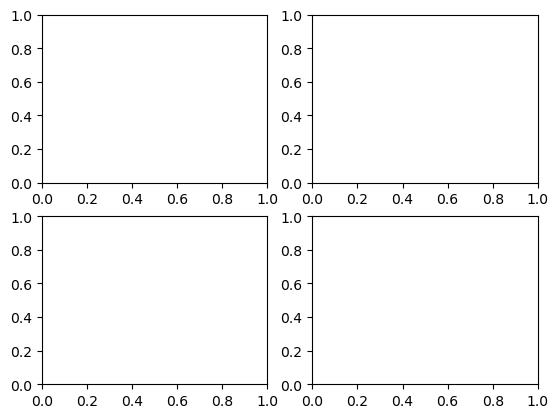

In [396]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

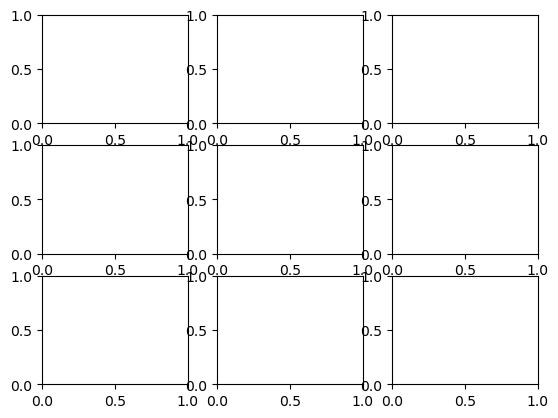

In [399]:
for i in range(1,10):
    plt.subplot(3,3,i)

[WinError 183] Cannot create a file when that file already exists: 'SUB_PLOT_BAR_CHART'


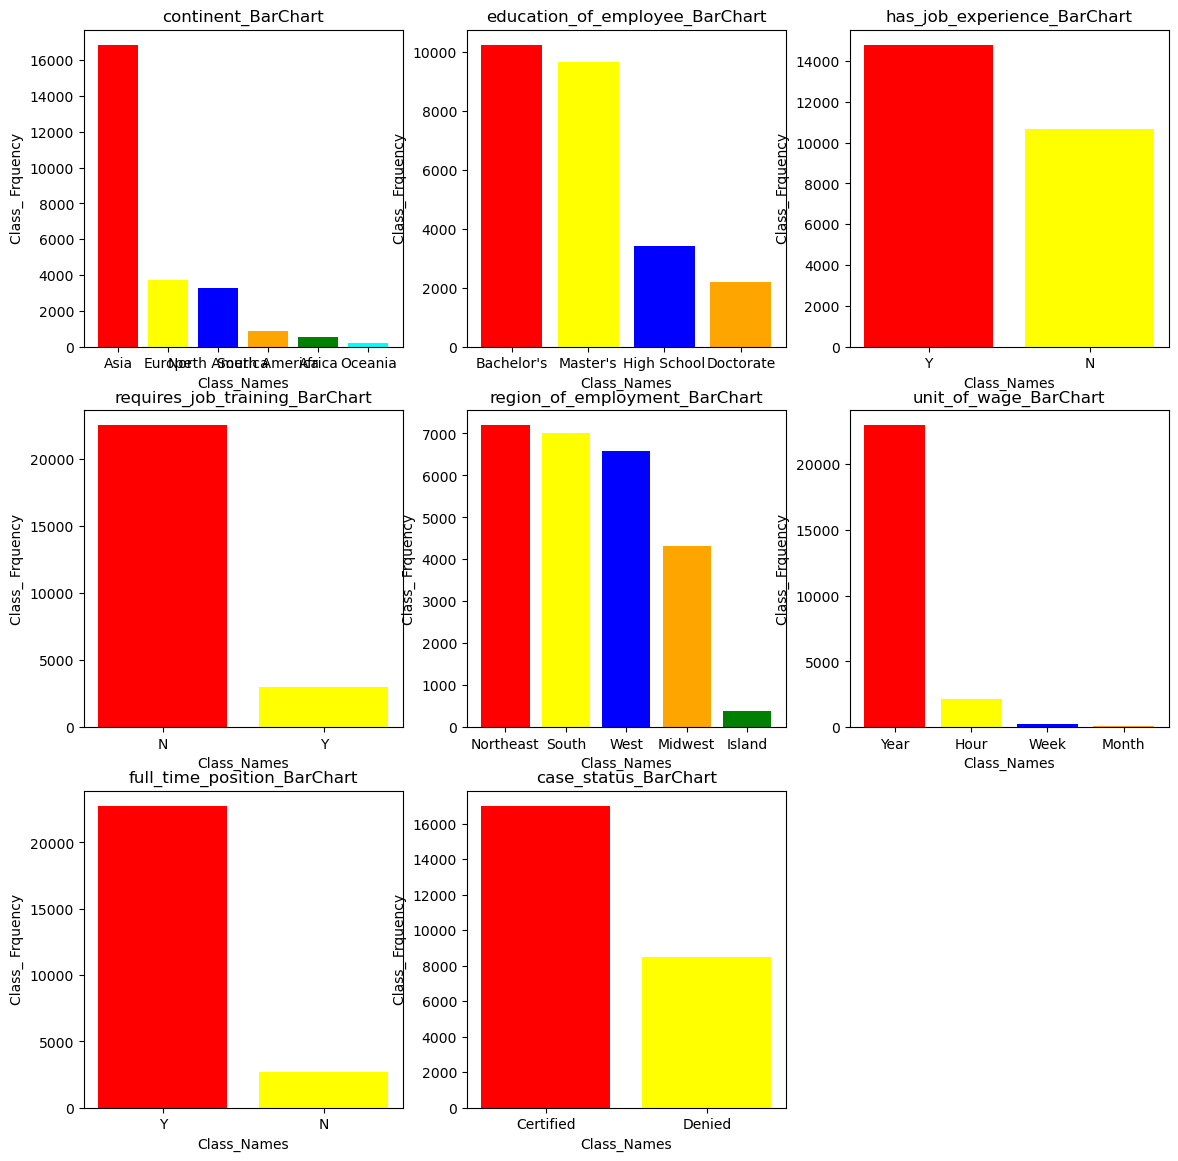

In [418]:
# Create Bar Chart and save in a separate folder
import os
folder_name = 'SUB_PLOT_BAR_CHART'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)
cwd = os.getcwd()
nwd = os.path.join(cwd,folder_name)
plt.figure(figsize=(14,14))
for i in range(1,len(cat)):
    keys = visa_df[cat[i]].value_counts().keys()
    values = visa_df[cat[i]].value_counts().values

    # SUB PLOT LINE
    plt.subplot(3,3,i)
    plt.bar(keys,values,color=colors)
    plt.xlabel('Class_Names')
    plt.ylabel('Class_ Frquency')
    plt.title(f'{cat[i]}_BarChart')
    file_name = f'{cat[i]}_Sub_Plot_BarChart.jpg'
    path = os.path.join(nwd,file_name)
    plt.savefig(path)


# Pie Chart

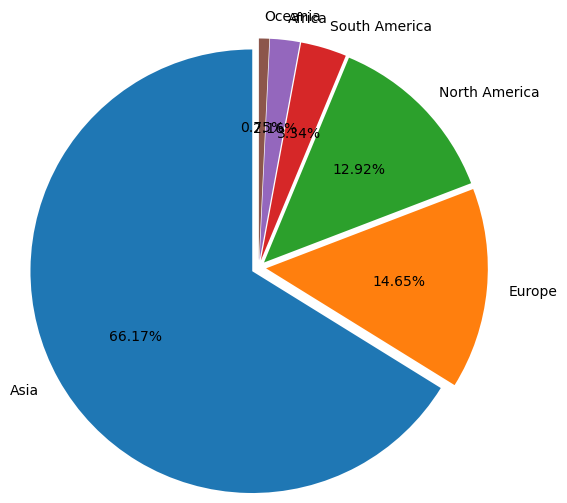

In [444]:
keys = visa_df['continent'].value_counts().keys()
values = visa_df['continent'].value_counts().values
plt.pie(values, 
        labels = keys,
       autopct='%0.2f%%',
        startangle=90,
       explode=[0.05 for i in range(6)],
       radius = 1.5)

plt.show()
